In [1131]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# age: Age of the customer (numerical).
# marital: Marital status (married, single, divorced).
# education: Level of education (secondary, tertiary, unknown).
# job: Type of job (management, technical, blue-collar, services, student, retired, housewife, unemployed).
# housing: Type of housing (own, rent).
# loan: Have they received a previous loan (yes/no).
# contact: Month of last contact (numerical).
# day: Day of week of last contact (numerical).
# month: Month of last contact (numerical).
# duration: Duration of last contact (seconds).
# campaign: Number of contacts during this campaign (numerical).
# previous: Number of previous contacts by phone (numerical).
# pdays: Number of days that passed since the customer was contacted for the previous campaign (numerical).
# preferred: Channel of communication preference (telephone, cellular).

In [1132]:
df = pd.read_csv("bank.csv")

In [1133]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,no


In [1134]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [1135]:
df.tail()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,no
11161,34,technician,married,secondary,0,no,no,cellular,9,jul,628,1,-1,0,no


In [1136]:
df.sample(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
3730,64,retired,married,secondary,588,no,no,cellular,16,jul,574,1,179,3,yes
4634,28,management,single,tertiary,1287,yes,no,cellular,26,feb,65,1,-1,0,yes
10678,33,technician,divorced,tertiary,0,yes,no,cellular,2,jun,72,1,-1,0,no
2233,60,management,divorced,tertiary,366,no,no,cellular,3,jun,593,1,-1,0,yes
9098,31,management,single,tertiary,518,yes,no,cellular,18,may,399,1,-1,0,no


In [1137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [1138]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [1139]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [1140]:
df.duplicated().sum()

np.int64(0)

# change data type

In [1141]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object

In [1142]:
# Select object data type only and change data type to categorical
cat_cols=df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].astype('category')

In [1143]:
df.dtypes

age             int64
job          category
marital      category
education    category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
deposit      category
dtype: object

In [1144]:
d_types = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": d_types, "Num_Uniqe": n_uniq}).T

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Dtypes,int64,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category
Num_Uniqe,76,12,3,4,3805,2,2,3,31,12,1428,36,472,34,2


# Drop Unnecessary Columns

In [1145]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [1146]:
cols_to_drop = ['contact', 'day', 'month','duration','previous']
df.drop(columns=cols_to_drop, inplace=True)

In [1147]:
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
0,59,admin.,married,secondary,2343,yes,no,1,-1,yes
1,56,admin.,married,secondary,45,no,no,1,-1,yes
2,41,technician,married,secondary,1270,yes,no,1,-1,yes
3,55,services,married,secondary,2476,yes,no,1,-1,yes
4,54,admin.,married,tertiary,184,no,no,2,-1,yes


# Check for outliers

In [1148]:
num_cols=df.select_dtypes(include=["number"])
num_cols.head()

,age,balance,campaign,pdays
0,59,2343,1,-1
1,56,45,1,-1
2,41,1270,1,-1
3,55,2476,1,-1
4,54,184,2,-1


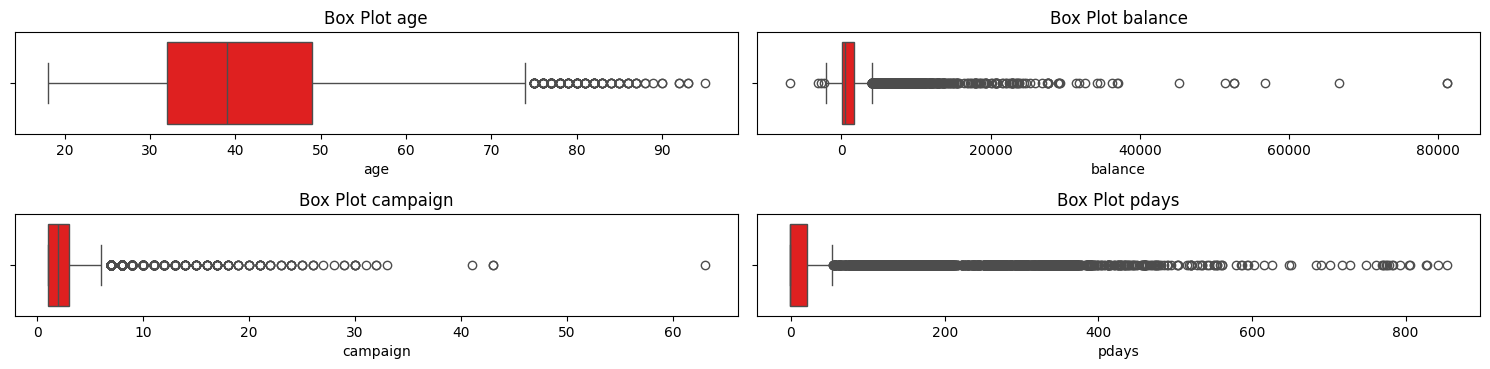

In [1149]:
plt.figure(figsize=(15,7))
for index,col in enumerate(num_cols.columns):
  plt.subplot(4,2,index+1)
  plt.title(f"Box Plot {col}")
  sns.boxplot(x=df[col],color="red")
plt.tight_layout()
plt.show()

# Replace outliers

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   balance    11162 non-null  int64   
 5   housing    11162 non-null  category
 6   loan       11162 non-null  category
 7   campaign   11162 non-null  int64   
 8   pdays      11162 non-null  int64   
 9   deposit    11162 non-null  category
dtypes: category(6), int64(4)
memory usage: 415.4 KB


In [1151]:
# for col in num_cols:
#         Q1= df[col].quantile(0.25)
#         Q3= df[col].quantile(0.75)
#         IQR=Q3-Q1
#         lower_fence=Q1-1.5*IQR
#         upper_fence=Q3+1.5*IQR
#         lower_outliers=df[df[col]<lower_fence][col].values
#         upper_outliers=df[df[col]>upper_fence][col].values
#         df[col].replace(upper_outliers,upper_fence,inplace=True)
#         df[col].replace(lower_outliers,lower_fence,inplace=True)

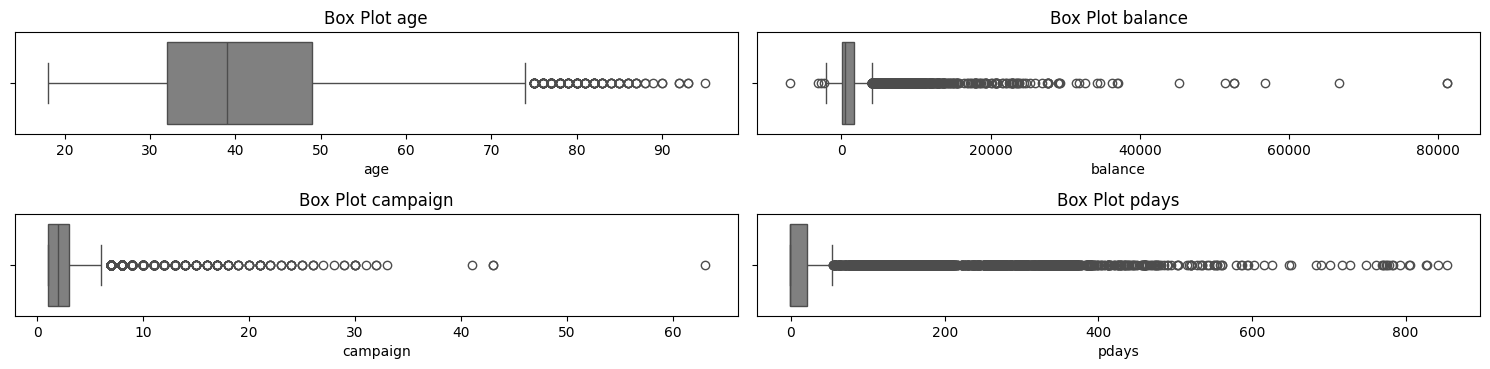

In [1152]:
plt.figure(figsize=(15,7))
for index,col in enumerate(num_cols.columns):
  plt.subplot(4,2,index+1)
  plt.title(f"Box Plot {col}")
  sns.boxplot(x=df[col],color="gray",)
plt.tight_layout()
plt.show()

In [1153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   balance    11162 non-null  int64   
 5   housing    11162 non-null  category
 6   loan       11162 non-null  category
 7   campaign   11162 non-null  int64   
 8   pdays      11162 non-null  int64   
 9   deposit    11162 non-null  category
dtypes: category(6), int64(4)
memory usage: 415.4 KB


# Remove outliers

In [1154]:
for col in num_cols:
        Q1= df[col].quantile(0.25)
        Q3= df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_fence=Q1-1.5*IQR
        upper_fence=Q3+1.5*IQR
        df=df[df[col]>=lower_fence]
        df=df[df[col]<=upper_fence]

In [1155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7824 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        7824 non-null   int64   
 1   job        7824 non-null   category
 2   marital    7824 non-null   category
 3   education  7824 non-null   category
 4   balance    7824 non-null   int64   
 5   housing    7824 non-null   category
 6   loan       7824 non-null   category
 7   campaign   7824 non-null   int64   
 8   pdays      7824 non-null   int64   
 9   deposit    7824 non-null   category
dtypes: category(6), int64(4)
memory usage: 352.5 KB


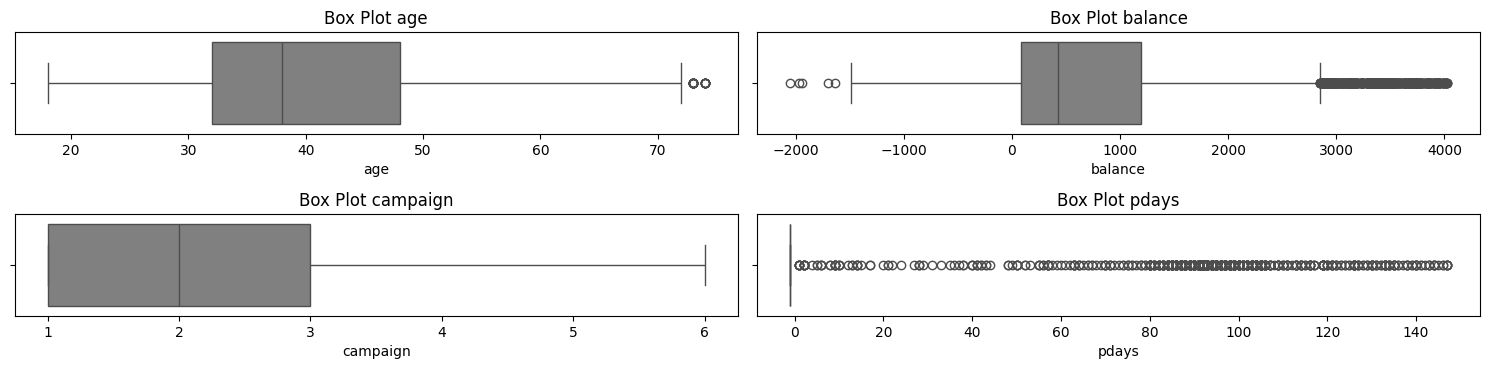

In [1156]:
plt.figure(figsize=(15,7))
for index,col in enumerate(num_cols.columns):
  plt.subplot(4,2,index+1)
  plt.title(f"Box Plot {col}")
  sns.boxplot(x=df[col],color="gray",)
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.tight_layout()
plt.show()

# Numerical Features

In [1157]:
num_cols=df.select_dtypes(include=["number"])
num_cols.head()

,age,balance,campaign,pdays
0,59,2343,1,-1
1,56,45,1,-1
2,41,1270,1,-1
3,55,2476,1,-1
4,54,184,2,-1


## Histplot

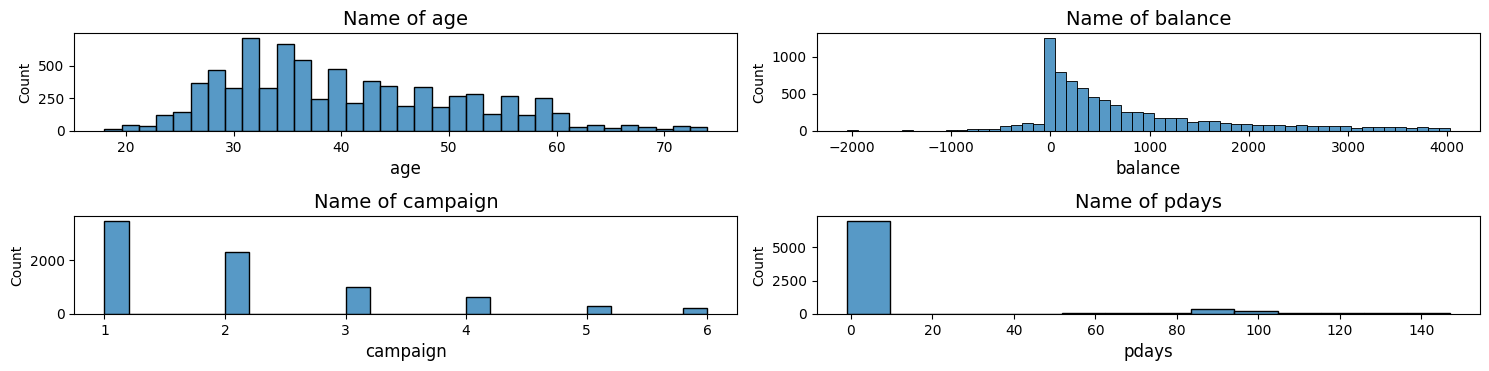

In [1158]:
plt.figure(figsize=(15,7))
for index,col in enumerate(num_cols,start=1):
  plt.subplot(4,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.histplot(x=df[col])
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

## Bar Plot

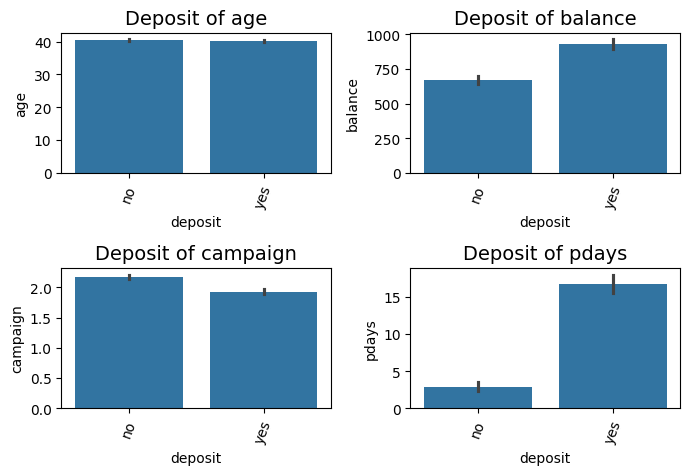

In [1159]:
plt.figure(figsize=(7,9))
for index,col in enumerate(num_cols,start=1):
  plt.subplot(4,2,index)
  plt.title(f"Deposit of {col}",fontsize=14)
  sns.barplot(x="deposit", y=col,data=df,)
  plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

## ScatterPlot

In [1160]:
num_cols=df.select_dtypes(include=["number"]).sort_values(by='age',ascending=True)
num_cols.head()

,age,balance,campaign,pdays
3494,18,348,4,-1
2654,18,108,1,-1
2498,18,608,1,-1
4219,18,3,2,-1
2464,18,108,1,-1


In [1161]:
Sorted_df_age=df.sort_values(by='age',ascending=True)

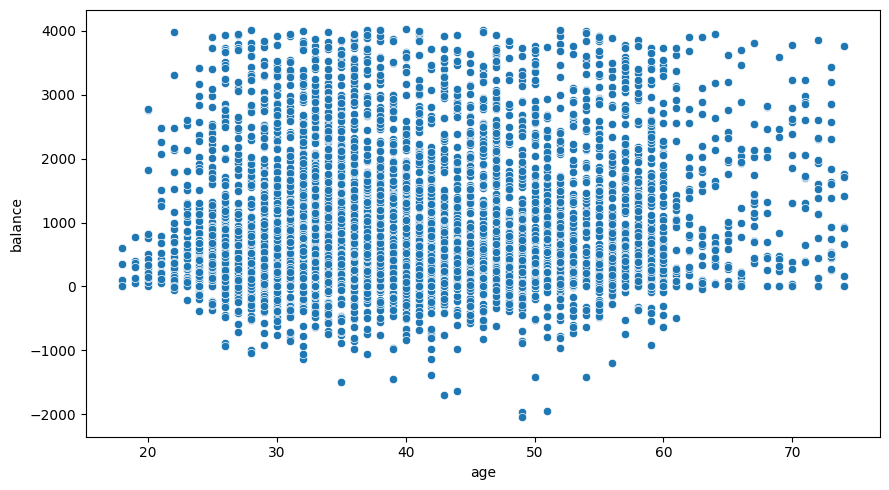

In [1162]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=Sorted_df_age['age'],y=Sorted_df_age['balance'])
plt.tight_layout()
plt.show()

## LinePlot

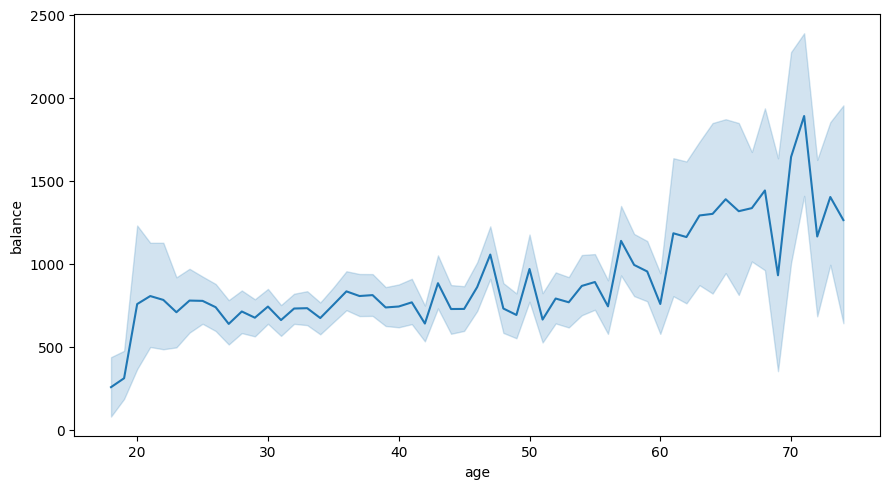

In [1163]:
plt.figure(figsize=(9,5))
sns.lineplot(x=Sorted_df_age['age'],y=Sorted_df_age['balance'])
plt.tight_layout()
plt.show()

In [1164]:
Sorted_df_pday=df.sort_values(by='pdays',ascending=True)
Sorted_df_pday.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
33,40,blue-collar,married,secondary,10,yes,no,2,-1,yes
1,56,admin.,married,secondary,45,no,no,1,-1,yes
2,41,technician,married,secondary,1270,yes,no,1,-1,yes
3,55,services,married,secondary,2476,yes,no,1,-1,yes
4,54,admin.,married,tertiary,184,no,no,2,-1,yes


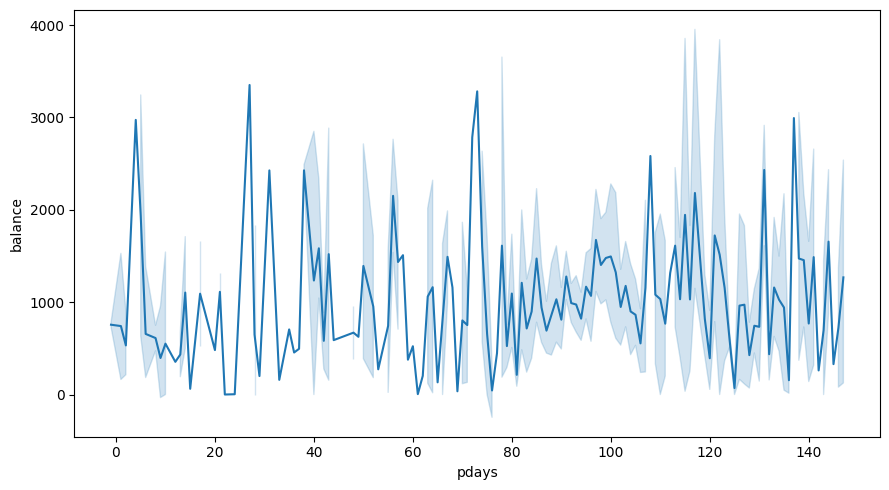

In [1165]:
plt.figure(figsize=(9,5))
sns.lineplot(x=Sorted_df_pday['pdays'],y=Sorted_df_pday['balance'])
plt.tight_layout()
plt.show()

In [1166]:
Sorted_df_campaign=df.sort_values(by='campaign',ascending=True)
Sorted_df_campaign.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
5234,27,technician,single,secondary,0,no,yes,1,-1,yes
5237,24,blue-collar,married,secondary,-389,yes,yes,1,-1,yes
5238,36,admin.,single,tertiary,364,no,yes,1,123,yes
5244,59,services,single,secondary,739,no,no,1,-1,yes
5246,30,services,divorced,secondary,436,yes,no,1,-1,yes


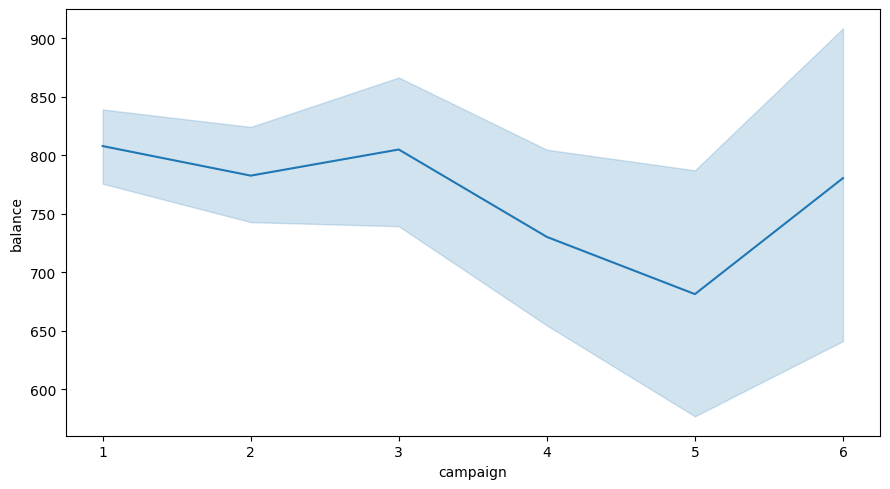

In [1167]:
plt.figure(figsize=(9,5))
sns.lineplot(x=Sorted_df_campaign['campaign'],y=Sorted_df_campaign['balance'])
plt.tight_layout()
plt.show()

In [1168]:
df.skew(numeric_only=True)

age         0.595497
balance     1.326260
campaign    1.303803
pdays       2.803907
dtype: float64

# Category Features

In [1169]:
#df['job']=df["job"].value_counts().sort_values(ascending=False)[:10]
cat_cols=df.select_dtypes(include=["category"])
cat_cols.head()

,job,marital,education,housing,loan,deposit
0,admin.,married,secondary,yes,no,yes
1,admin.,married,secondary,no,no,yes
2,technician,married,secondary,yes,no,yes
3,services,married,secondary,yes,no,yes
4,admin.,married,tertiary,no,no,yes


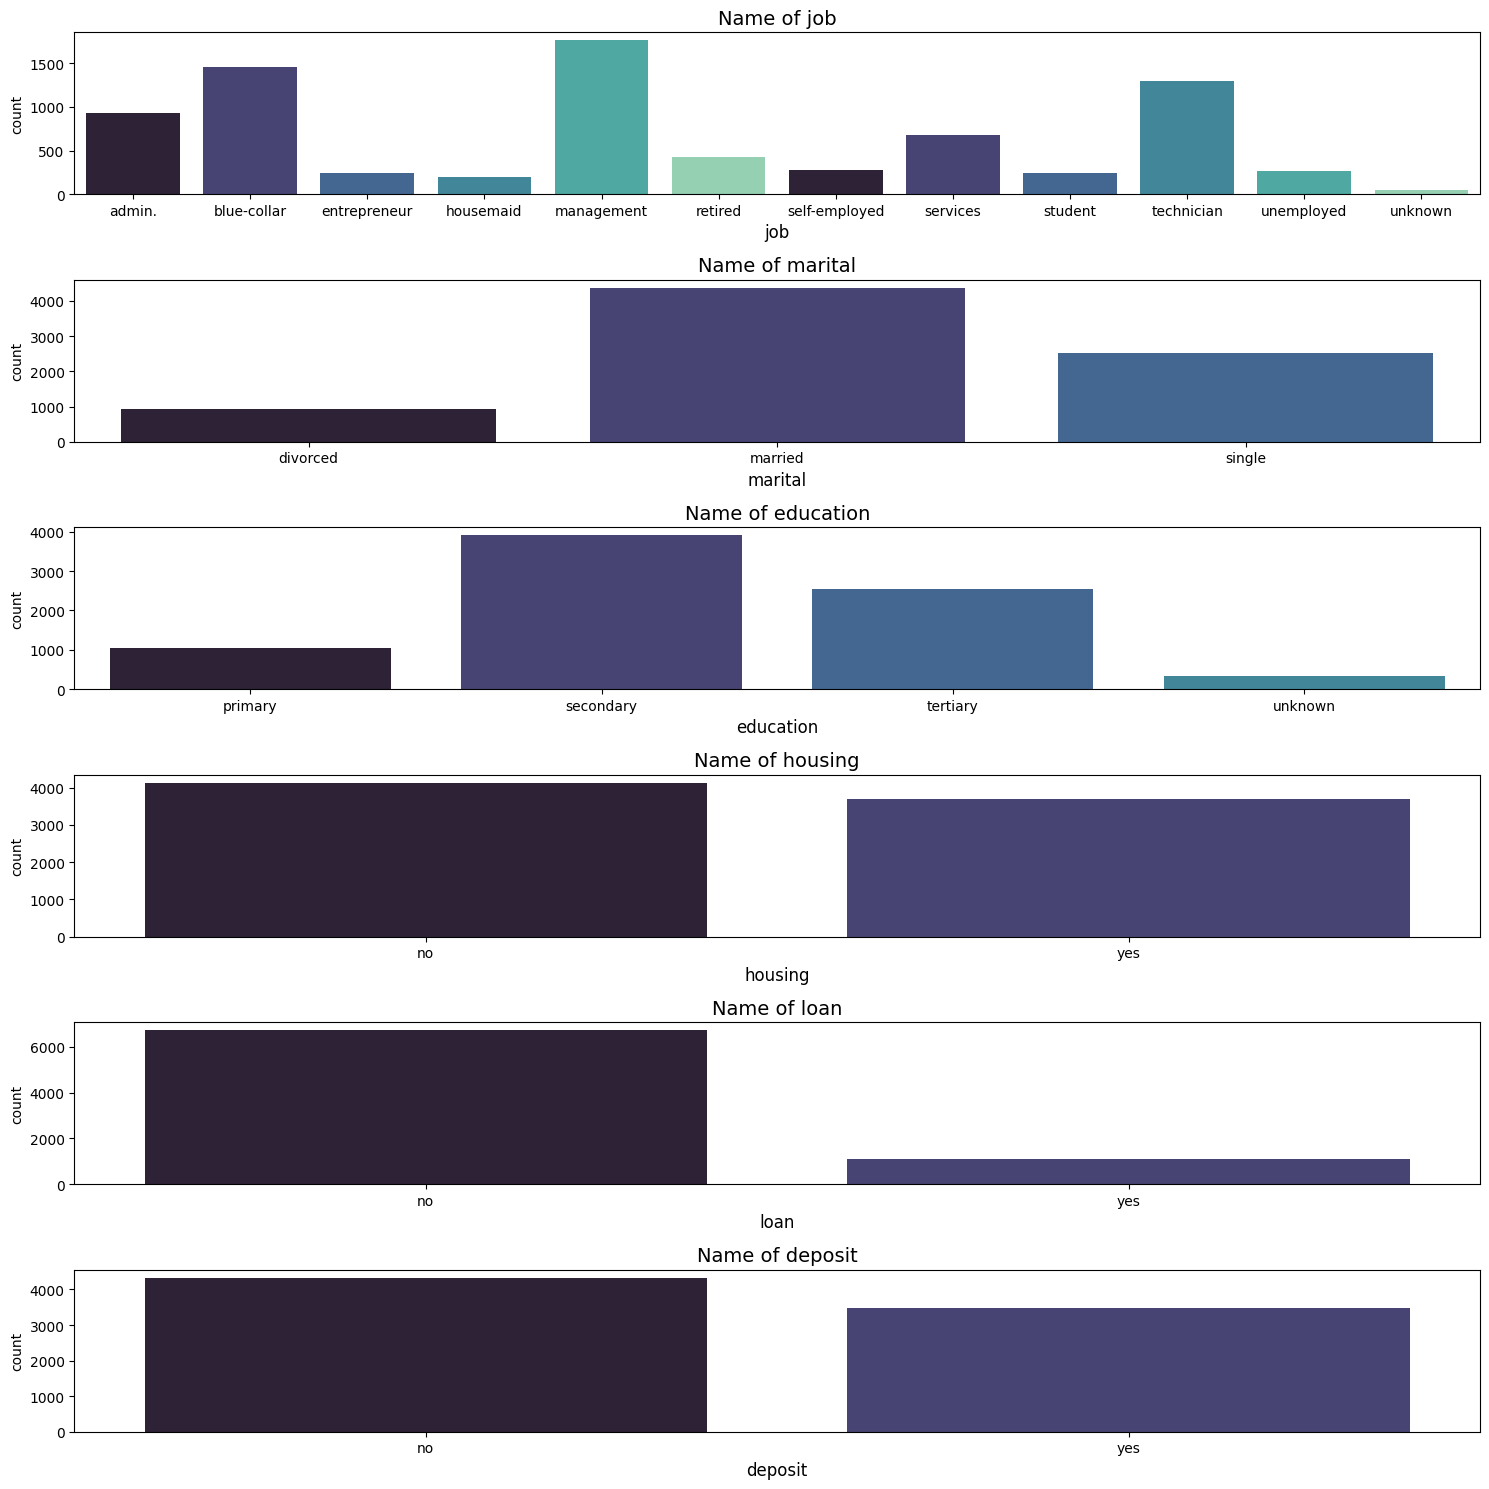

In [1170]:
plt.figure(figsize=(15,15))
for index,col in enumerate(cat_cols,start=1):
  plt.subplot(6,1,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.countplot(x=df[col],palette=sns.color_palette("mako"))
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

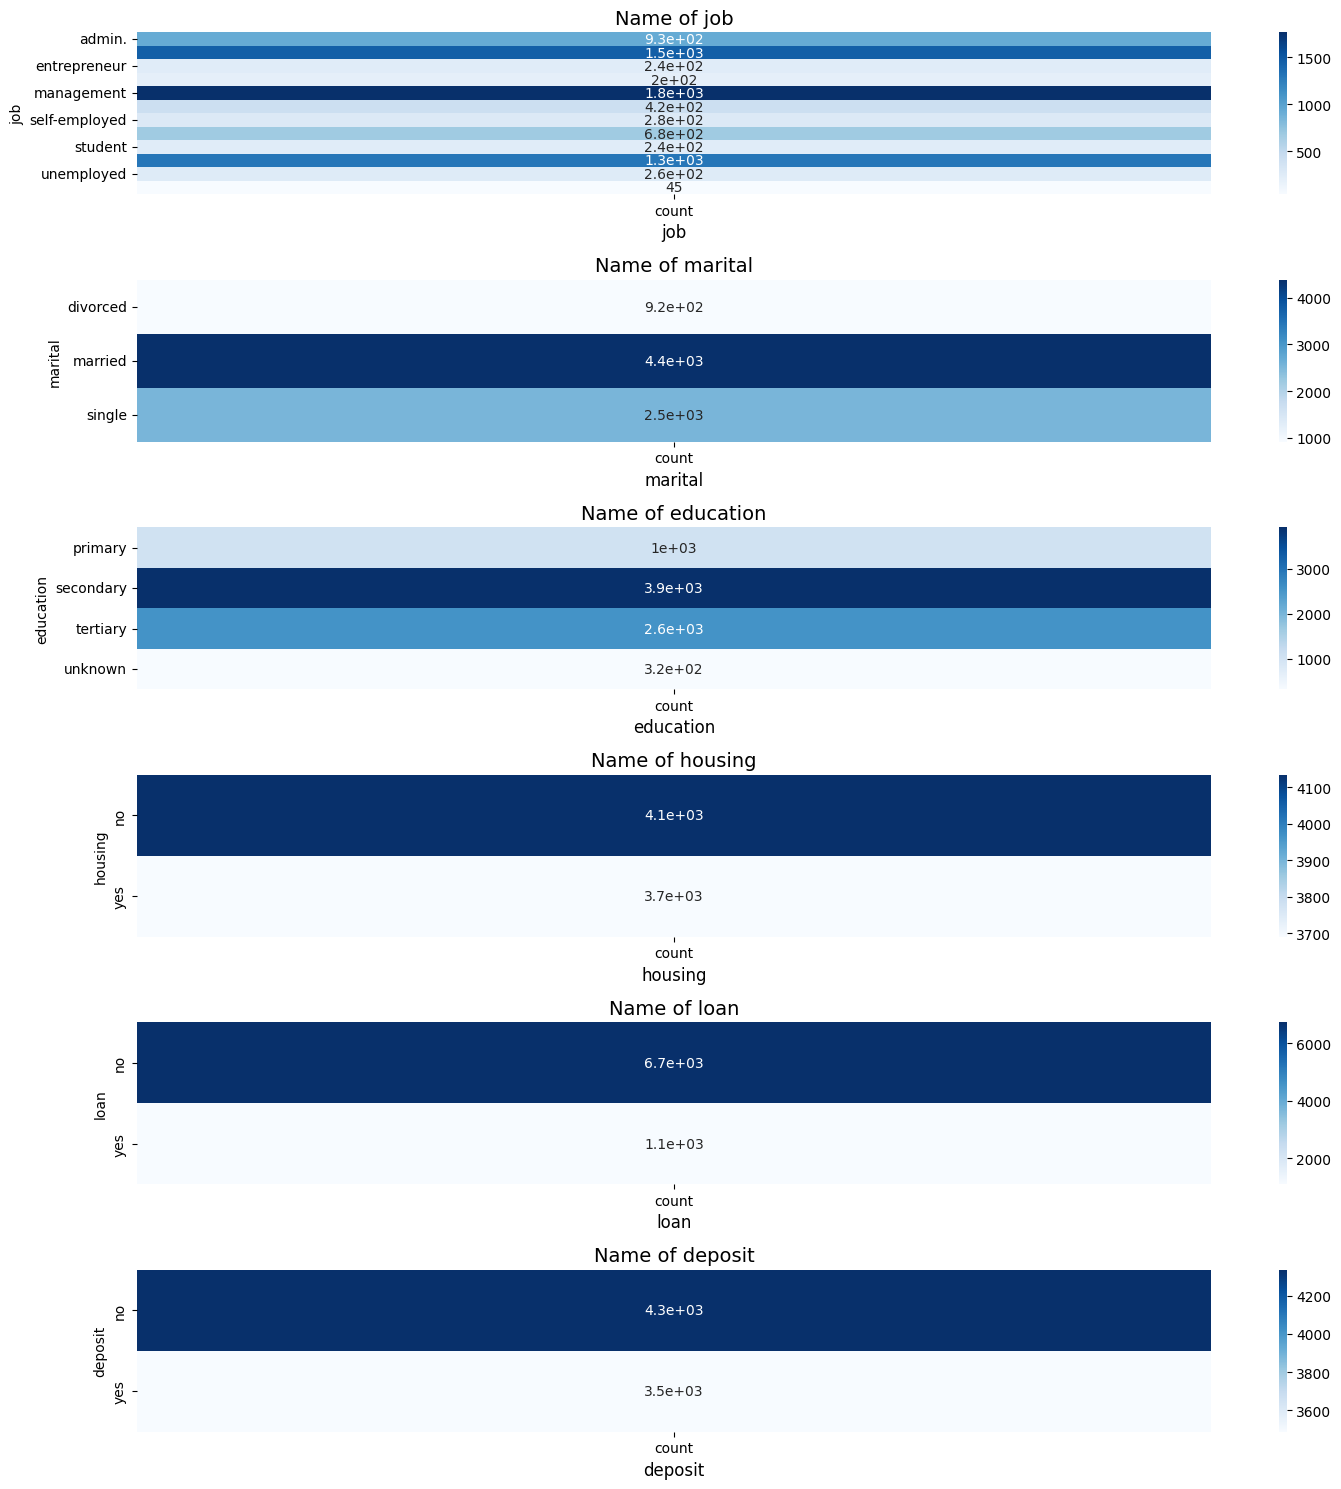

In [1171]:
plt.figure(figsize=(15,15))
for index,col in enumerate(cat_cols,start=1):
  plt.subplot(6,1,index)
  plt.title(f"Name of {col}",fontsize=14)
   # Calculate frequency table using crosstab
  ct = pd.crosstab(index=df[col], columns="count") 

  sns.heatmap(ct, annot=True, cmap=sns.color_palette("Blues", as_cmap=True)) # Use ct as data
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

# Data Splitting

In [1172]:
df.nunique()

age            57
job            12
marital         3
education       4
balance      2701
housing         2
loan            2
campaign        6
pdays         129
deposit         2
dtype: int64

In [1173]:
X = df.drop(columns="deposit")
Y = df[["deposit"]]

In [1174]:
from sklearn.model_selection import train_test_split

In [1175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [1176]:
X_train.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays
1878,25,student,single,primary,373,yes,no,2,-1
8371,40,blue-collar,married,primary,13,yes,no,1,-1
5508,28,management,single,tertiary,203,no,no,2,-1
10474,40,blue-collar,married,primary,-66,yes,no,1,-1
5275,59,management,married,tertiary,553,yes,no,3,-1


In [1177]:
Y_train.head()

,deposit
1878,yes
8371,no
5508,no
10474,no
5275,yes


In [1178]:
num_cols=X.select_dtypes('number').columns
num_cols

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

In [1179]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [1180]:
X_train

,age,job,marital,education,balance,housing,loan,campaign,pdays
1878,0.125000,student,single,primary,0.398880,yes,no,0.2,0.000000
8371,0.392857,blue-collar,married,primary,0.339592,yes,no,0.0,0.000000
5508,0.178571,management,single,tertiary,0.370883,no,no,0.2,0.000000
10474,0.392857,blue-collar,married,primary,0.326581,yes,no,0.0,0.000000
5275,0.732143,management,married,tertiary,0.428524,yes,no,0.4,0.000000
...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,single,primary,0.334980,no,yes,0.2,0.000000
7852,0.553571,entrepreneur,married,secondary,0.450593,no,no,1.0,0.000000
1043,0.517857,technician,married,secondary,0.337451,no,no,0.0,0.074324
10862,0.428571,unemployed,married,secondary,0.310277,yes,yes,0.4,0.000000


- ## Encoder ##

In [1181]:
from sklearn.preprocessing import OrdinalEncoder
cols_to_encode=["housing","loan"]
categories_list=[["no","yes"],["no","yes"]]
ordinal_encoder=OrdinalEncoder(categories=categories_list)
X_train[cols_to_encode]=ordinal_encoder.fit_transform(X_train[cols_to_encode])
X_test[cols_to_encode]=ordinal_encoder.transform(X_test[cols_to_encode])

In [1182]:
X_train

,age,job,marital,education,balance,housing,loan,campaign,pdays
1878,0.125000,student,single,primary,0.398880,1.0,0.0,0.2,0.000000
8371,0.392857,blue-collar,married,primary,0.339592,1.0,0.0,0.0,0.000000
5508,0.178571,management,single,tertiary,0.370883,0.0,0.0,0.2,0.000000
10474,0.392857,blue-collar,married,primary,0.326581,1.0,0.0,0.0,0.000000
5275,0.732143,management,married,tertiary,0.428524,1.0,0.0,0.4,0.000000
...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,single,primary,0.334980,0.0,1.0,0.2,0.000000
7852,0.553571,entrepreneur,married,secondary,0.450593,0.0,0.0,1.0,0.000000
1043,0.517857,technician,married,secondary,0.337451,0.0,0.0,0.0,0.074324
10862,0.428571,unemployed,married,secondary,0.310277,1.0,1.0,0.4,0.000000


In [1183]:
pd.DataFrame({
    "Data type": df.dtypes,
    "Data Uniqe":df.nunique()
}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Data type,int64,category,category,category,int64,category,category,int64,int64,category
Data Uniqe,57,12,3,4,2701,2,2,6,129,2


In [1184]:
cols_to_marital = ["marital"]
categories_list = [["single", "divorced", "married"]]  # Corrected categories list

ordinal_encoder = OrdinalEncoder(categories=categories_list)
X_train[cols_to_marital] = ordinal_encoder.fit_transform(X_train[cols_to_marital])
X_test[cols_to_marital] = ordinal_encoder.transform(X_test[cols_to_marital])

In [1185]:
X_train

,age,job,marital,education,balance,housing,loan,campaign,pdays
1878,0.125000,student,0.0,primary,0.398880,1.0,0.0,0.2,0.000000
8371,0.392857,blue-collar,2.0,primary,0.339592,1.0,0.0,0.0,0.000000
5508,0.178571,management,0.0,tertiary,0.370883,0.0,0.0,0.2,0.000000
10474,0.392857,blue-collar,2.0,primary,0.326581,1.0,0.0,0.0,0.000000
5275,0.732143,management,2.0,tertiary,0.428524,1.0,0.0,0.4,0.000000
...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,0.0,primary,0.334980,0.0,1.0,0.2,0.000000
7852,0.553571,entrepreneur,2.0,secondary,0.450593,0.0,0.0,1.0,0.000000
1043,0.517857,technician,2.0,secondary,0.337451,0.0,0.0,0.0,0.074324
10862,0.428571,unemployed,2.0,secondary,0.310277,1.0,1.0,0.4,0.000000


In [1186]:
cols_to_education = ["education"]
categories_list = [["secondary", "tertiary", "primary","unknown"]]  # Corrected categories list

ordinal_encoder = OrdinalEncoder(categories=categories_list)
X_train[cols_to_education] = ordinal_encoder.fit_transform(X_train[cols_to_education])
X_test[cols_to_education] = ordinal_encoder.transform(X_test[cols_to_education])

In [1187]:
X_train

,age,job,marital,education,balance,housing,loan,campaign,pdays
1878,0.125000,student,0.0,2.0,0.398880,1.0,0.0,0.2,0.000000
8371,0.392857,blue-collar,2.0,2.0,0.339592,1.0,0.0,0.0,0.000000
5508,0.178571,management,0.0,1.0,0.370883,0.0,0.0,0.2,0.000000
10474,0.392857,blue-collar,2.0,2.0,0.326581,1.0,0.0,0.0,0.000000
5275,0.732143,management,2.0,1.0,0.428524,1.0,0.0,0.4,0.000000
...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,0.0,2.0,0.334980,0.0,1.0,0.2,0.000000
7852,0.553571,entrepreneur,2.0,0.0,0.450593,0.0,0.0,1.0,0.000000
1043,0.517857,technician,2.0,0.0,0.337451,0.0,0.0,0.0,0.074324
10862,0.428571,unemployed,2.0,0.0,0.310277,1.0,1.0,0.4,0.000000


## Encoder for Job

In [1190]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
X_train['job_encoder'] = Label_encoder.fit_transform(X_train['job'])
X_test['job_encoder'] = Label_encoder.transform(X_test['job'])

In [ ]:
X_train

,age,job,marital,education,balance,housing,loan,campaign,pdays,job_encoder
1878,0.125000,student,0.0,2.0,0.398880,1.0,0.0,0.2,0.000000,8
8371,0.392857,blue-collar,2.0,2.0,0.339592,1.0,0.0,0.0,0.000000,1
5508,0.178571,management,0.0,1.0,0.370883,0.0,0.0,0.2,0.000000,4
10474,0.392857,blue-collar,2.0,2.0,0.326581,1.0,0.0,0.0,0.000000,1
5275,0.732143,management,2.0,1.0,0.428524,1.0,0.0,0.4,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,0.0,2.0,0.334980,0.0,1.0,0.2,0.000000,1
7852,0.553571,entrepreneur,2.0,0.0,0.450593,0.0,0.0,1.0,0.000000,2
1043,0.517857,technician,2.0,0.0,0.337451,0.0,0.0,0.0,0.074324,9
10862,0.428571,unemployed,2.0,0.0,0.310277,1.0,1.0,0.4,0.000000,10


In [1191]:
job_encoder_col = X_train.pop('job_encoder')
X_train.insert(2, 'job_encoder', job_encoder_col)

In [1192]:
X_train

,age,job,job_encoder,marital,education,balance,housing,loan,campaign,pdays
1878,0.125000,student,8,0.0,2.0,0.398880,1.0,0.0,0.2,0.000000
8371,0.392857,blue-collar,1,2.0,2.0,0.339592,1.0,0.0,0.0,0.000000
5508,0.178571,management,4,0.0,1.0,0.370883,0.0,0.0,0.2,0.000000
10474,0.392857,blue-collar,1,2.0,2.0,0.326581,1.0,0.0,0.0,0.000000
5275,0.732143,management,4,2.0,1.0,0.428524,1.0,0.0,0.4,0.000000
...,...,...,...,...,...,...,...,...,...,...
7634,0.267857,blue-collar,1,0.0,2.0,0.334980,0.0,1.0,0.2,0.000000
7852,0.553571,entrepreneur,2,2.0,0.0,0.450593,0.0,0.0,1.0,0.000000
1043,0.517857,technician,9,2.0,0.0,0.337451,0.0,0.0,0.0,0.074324
10862,0.428571,unemployed,10,2.0,0.0,0.310277,1.0,1.0,0.4,0.000000


In [ ]:
df2=pd.get_dummies(df,dtype=int)
df2.head()

,age,balance,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,deposit_no,deposit_yes
0,59,2343,1,-1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1,56,45,1,-1,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
2,41,1270,1,-1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,55,2476,1,-1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,54,184,2,-1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
